In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import std

In [2]:
path = "Data/ukcp09_gridded-land-obs-daily_timeseries_mean-temperature_000000E_500000N_19600101-20161231.csv"
data = pd.read_csv(path, header=[0,1], index_col=0)
dates_to_remove = [str(y)+"-02-29" for y in range(1960, 2017, 4)]
data = data.drop(dates_to_remove)
X = data["22500"]["547500"]
data.head()

easting,22500,27500,32500,37500,42500,47500,27500,32500,37500,42500,...,37500,42500,47500,17500,22500,27500,32500,37500,42500,47500
northing,547500,547500,547500,547500,547500,547500,542500,542500,542500,542500,...,507500,507500,507500,502500,502500,502500,502500,502500,502500,502500
1960-01-01,6.20,6.40,6.94,7.14,7.15,7.23,5.87,6.01,6.46,6.67,...,6.44,6.22,6.62,6.11,7.09,7.00,6.74,6.73,6.74,6.84
1960-01-02,4.53,4.58,4.81,4.90,4.90,5.06,4.20,4.24,4.51,4.66,...,4.05,3.97,4.38,4.40,4.82,4.66,4.38,4.36,4.43,4.65
1960-01-03,8.48,8.51,8.72,8.70,8.49,8.39,8.18,8.12,8.29,8.23,...,8.75,8.44,8.67,8.96,9.58,9.43,9.09,8.97,8.87,8.90
1960-01-04,7.02,7.09,7.31,7.34,7.27,7.34,6.83,6.85,7.05,7.10,...,7.39,7.14,7.34,7.51,8.04,7.94,7.67,7.56,7.50,7.54
1960-01-05,2.49,2.74,3.31,3.49,3.52,3.59,2.40,2.57,2.95,3.12,...,4.02,3.54,3.59,2.94,4.20,4.26,4.09,3.97,3.81,3.63


In [3]:
def transform(series, weights, shifts):
    l = [weights[k] * series.shift(shifts[k]) for k in range(len(shifts))]
    return sum(l)

In [7]:
weights1 = [1/1095]*1095
shifts1 = list(range(-547, 548))

In [8]:
weights2 = [0]*1461
weights2[0] = 1/9
weights2[365] = 2/9
weights2[730] = 3/9
weights2[1095] = 2/9
weights2[1460] = 1/9
shifts2 = list(range(-365, 366))

In [9]:
def decompose(data, easting, northing, weights_t, shifts_t, weights_s, shifts_s, plot=False):
    plt.figure(figsize=(20,20))
    
    X = data[easting][northing]
    plt.subplot(221)
    plt.plot(list(X)[2000:4000])
    plt.title("Série brute")
    X_t1 = transform(X, weights1, shifts1)
    X_t1.to_csv("Decomposition/Trend/"+easting+"-"+northing+".csv")
    X1 = X - X_t1
    
    plt.subplot(222)
    plt.plot(list(X_t1))
    plt.title("Tendance")
    
    plt.subplot(223)
    X_s1 = transform(X1, weights2, shifts2)
    X_S1 = X_s1 - transform(X_s1, weights1, shifts1)
    X_S1.to_csv("Decomposition/Seasons/"+easting+"-"+northing+".csv")
    plt.plot(list(X_S1)[2000:4000])
    plt.title("Saisonnalités")
    
    plt.subplot(224)
    X_CVS = X - X_S1 - X_t1
    X_CVS.to_csv("Decomposition/Noise/"+easting+"-"+northing+".csv")
    plt.plot(list(X_CVS)[2000:4000])
    plt.title("Bruit")
    if plot:
        plt.show()

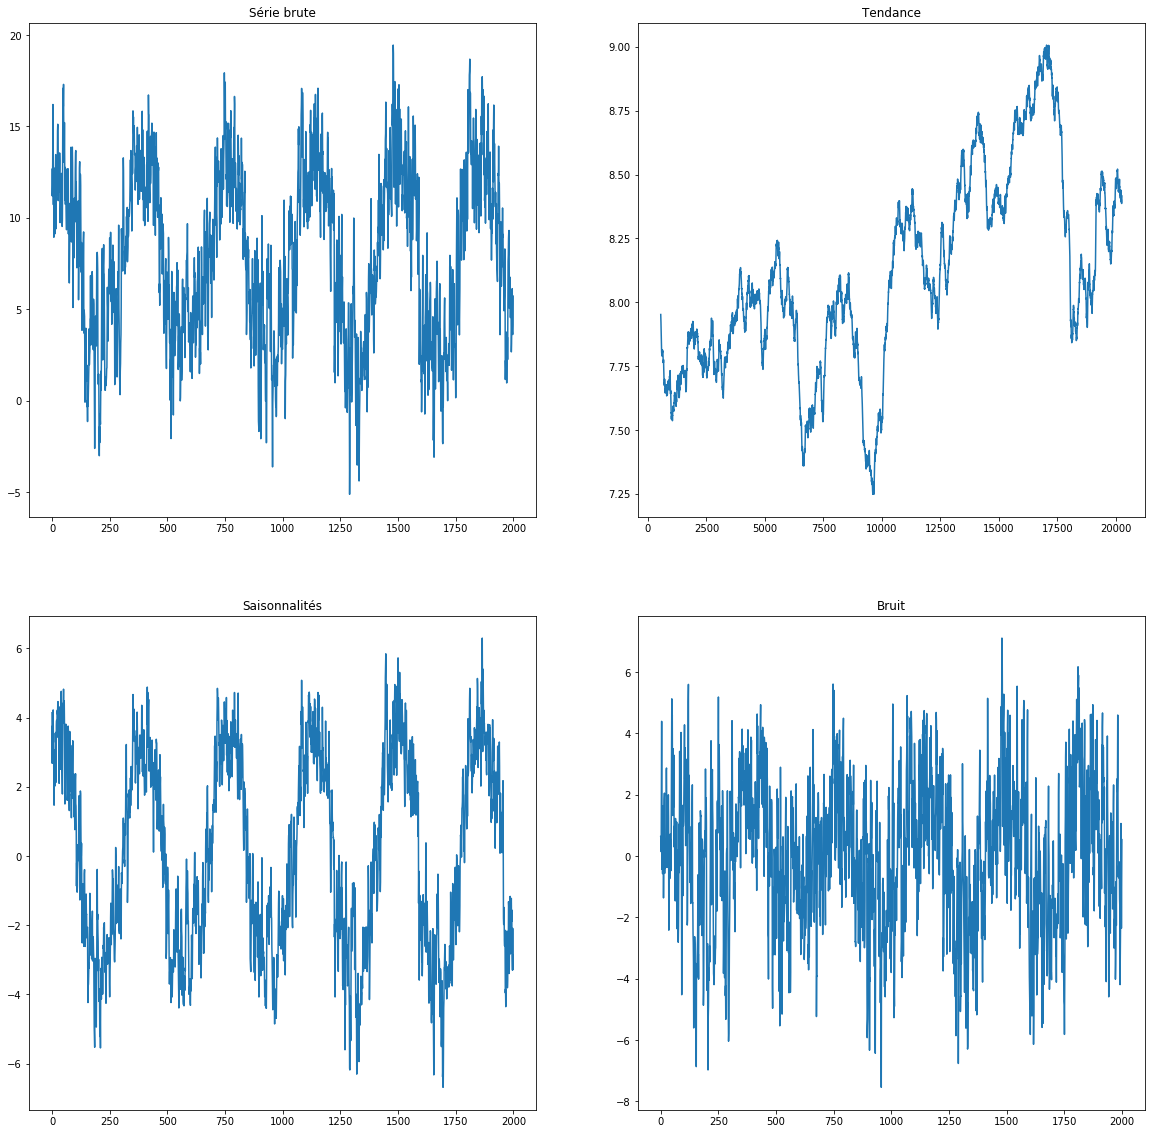

In [10]:
decompose(data,"22500", "547500", weights1, shifts1, weights2, shifts2, plot=True)

# decompose(X, weights1, shifts1, weights2, shifts2)

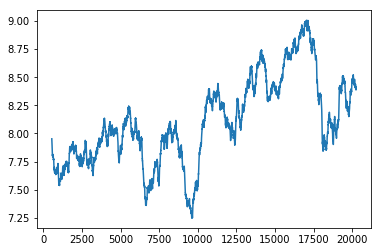

In [223]:
plt.plot(list(X_t1))

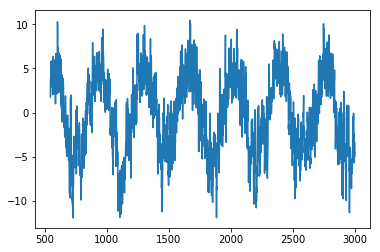

In [224]:
plt.plot(list(X1)[:3000])

In [225]:
X_s1 = transform(X1, weights2, shifts2)
X_S1 = X_s1 - transform(X_s1, weights1, shifts1)

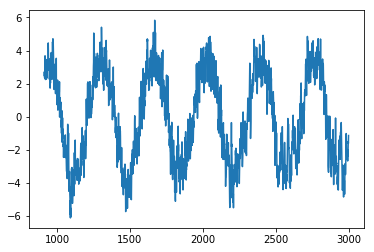

In [226]:
plt.plot(list(X_s1[:3000]))

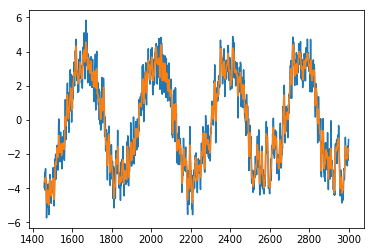

In [227]:
X_S1_lisse = transform(X_S1, weights3, shifts3)
plt.plot(list(X_S1[:3000]))
plt.plot(list(X_S1_lisse)[:3000])
plt.show()

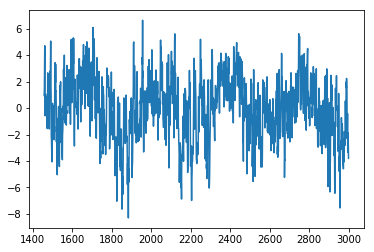

In [228]:
X_CVS = X - X_S1 - X_t1
plt.plot(list(X_CVS)[:3000])

In [215]:
X_t2 = transform(X_CVS, weights3, shifts3)

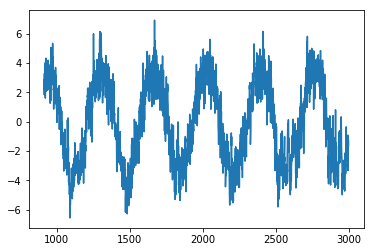

In [219]:
plt.plot(list(X_t2)[:3000])

1968-03-22     5.192839
1968-03-23     7.084560
1968-03-24     7.283165
1968-03-25     5.300532
1968-03-26     9.377348
1968-03-27    10.735177
1968-03-28    12.708445
1968-03-29     8.896154
1968-03-30     6.660001
1968-03-31     8.185029
1968-04-01     9.463016
1968-04-02     2.455961
1968-04-03     3.336828
1968-04-04     2.830443
1968-04-05     4.035429
1968-04-06     5.863398
1968-04-07     5.159322
1968-04-08     6.615452
1968-04-09     6.899057
1968-04-10     6.053157
Name: 547500, dtype: float64

In [213]:
X_t2[3000:3020]

1968-03-22     5.275691
1968-03-23     6.948063
1968-03-24     6.642239
1968-03-25     6.550188
1968-03-26     8.487942
1968-03-27    11.450016
1968-03-28    11.697898
1968-03-29     9.276258
1968-03-30     7.114752
1968-03-31     8.480922
1968-04-01     7.685288
1968-04-02     4.324531
1968-04-03     2.428263
1968-04-04     3.137881
1968-04-05     4.187175
1968-04-06     5.287199
1968-04-07     5.748569
1968-04-08     6.367582
1968-04-09     6.681744
1968-04-10     6.504747
Name: 547500, dtype: float64